# Study Case

The objective of the assignment is to use the following data set to **provide advice to a client of your choosing**. The data set is Crash Stats - Data Extract - Datasets - Victorian Government Data Directory. This is public data was collected on the web and is not related to any work we currently undertake.

**We would like you to investigate, analyse it and prepare a presentation.** You may also supplement the analysis with additional data as you see fit, but the core analysis should be focused on the crashes.

# Data Analysis

In [1]:
# Standard imports

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [7]:
df_acc = pd.read_csv('data/acc_dataset.csv')
df_acc.head()

,ACCIDENT_NO,ACCIDENT_DATE_TIME,ACCIDENT_TYPE,Accident Type Desc,DAY_OF_WEEK,Day Week Description,DCA_CODE,DCA Description,LIGHT_CONDITION,Light Condition Desc,...,ROAD_GEOMETRY,Road Geometry Desc,SPEED_ZONE,MEAN_AGE,MEAN_VEHI_YEAR_MANUF,ROAD_SURFACE_TYPE,ATMOSPH_COND,Atmosph Cond Desc,SURFACE_COND,Surface Cond Desc
0,T20060000010,2006-01-13 12:42:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),1,Day,...,1,Cross intersection,60,47.600000,2000.0,1.0,1,Clear,1,Dry
1,T20060000018,2006-01-13 19:10:00,1,Collision with vehicle,6,Friday,113,RIGHT NEAR (INTERSECTIONS ONLY),1,Day,...,2,T intersection,70,21.500000,1994.5,1.0,1,Clear,1,Dry
2,T20060000022,2006-01-14 12:10:00,7,Fall from or in moving vehicle,7,Saturday,190,FELL IN/FROM VEHICLE,1,Day,...,5,Not at intersection,100,47.500000,1995.0,1.0,1,Clear,1,Dry
3,T20060000023,2006-01-14 11:49:00,1,Collision with vehicle,7,Saturday,130,REAR END(VEHICLES IN SAME LANE),1,Day,...,2,T intersection,80,42.500000,2000.5,1.0,1,Clear,1,Dry
4,T20060000026,2006-01-14 10:45:00,1,Collision with vehicle,7,Saturday,121,RIGHT THROUGH,1,Day,...,5,Not at intersection,50,57.666667,1991.0,1.0,1,Clear,1,Dry


## Basic statistics

In [8]:
df_acc.describe()

,ACCIDENT_TYPE,DAY_OF_WEEK,DCA_CODE,LIGHT_CONDITION,NODE_ID,NO_OF_VEHICLES,NO_PERSONS,NO_PERSONS_INJ_2,NO_PERSONS_INJ_3,NO_PERSONS_KILLED,NO_PERSONS_NOT_INJ,ROAD_GEOMETRY,SPEED_ZONE,MEAN_AGE,MEAN_VEHI_YEAR_MANUF,ROAD_SURFACE_TYPE,ATMOSPH_COND,SURFACE_COND
count,203708.000000,203708.000000,203708.000000,203708.000000,203708.000000,203708.000000,203708.000000,203708.000000,203708.000000,203708.000000,203708.000000,203708.000000,203708.000000,203185.000000,197718.000000,203708.000000,203708.000000,203708.000000
mean,2.262106,3.975283,139.295487,1.834675,190955.262096,1.792998,2.410328,0.400240,0.862435,0.019803,1.127575,3.351965,121.605995,38.538657,1910.063062,1.169267,1.740153,1.579128
std,2.002073,1.990020,26.479004,1.540046,151789.148066,0.749319,1.502407,0.633963,0.779561,0.155349,1.313800,1.780496,216.078965,14.455368,350.919690,0.799000,2.104480,1.770274
min,1.000000,0.000000,100.000000,1.000000,-10.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,30.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,1.000000,2.000000,120.000000,1.000000,43723.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,60.000000,27.250000,1997.000000,1.000000,1.000000,1.000000
50%,1.000000,4.000000,130.000000,1.000000,218026.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,5.000000,60.000000,36.500000,2003.000000,1.000000,1.000000,1.000000
75%,4.000000,6.000000,171.000000,2.000000,281585.250000,2.000000,3.000000,1.000000,1.000000,0.000000,1.000000,5.000000,80.000000,47.500000,2007.333333,1.000000,1.000000,1.000000
max,9.000000,7.000000,199.000000,9.000000,666096.000000,21.000000,97.000000,17.000000,43.000000,11.000000,87.000000,9.000000,999.000000,101.000000,2502.500000,9.000000,9.000000,9.000000


In [9]:
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203708 entries, 0 to 203707
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ACCIDENT_NO           203708 non-null  object 
 1   ACCIDENT_DATE_TIME    203708 non-null  object 
 2   ACCIDENT_TYPE         203708 non-null  int64  
 3   Accident Type Desc    203708 non-null  object 
 4   DAY_OF_WEEK           203708 non-null  int64  
 5   Day Week Description  203708 non-null  object 
 6   DCA_CODE              203708 non-null  int64  
 7   DCA Description       203708 non-null  object 
 8   LIGHT_CONDITION       203708 non-null  int64  
 9   Light Condition Desc  203708 non-null  object 
 10  NODE_ID               203708 non-null  int64  
 11  NO_OF_VEHICLES        203708 non-null  int64  
 12  NO_PERSONS            203708 non-null  int64  
 13  NO_PERSONS_INJ_2      203708 non-null  int64  
 14  NO_PERSONS_INJ_3      203708 non-null  int64  
 15  

## Dealing with null values

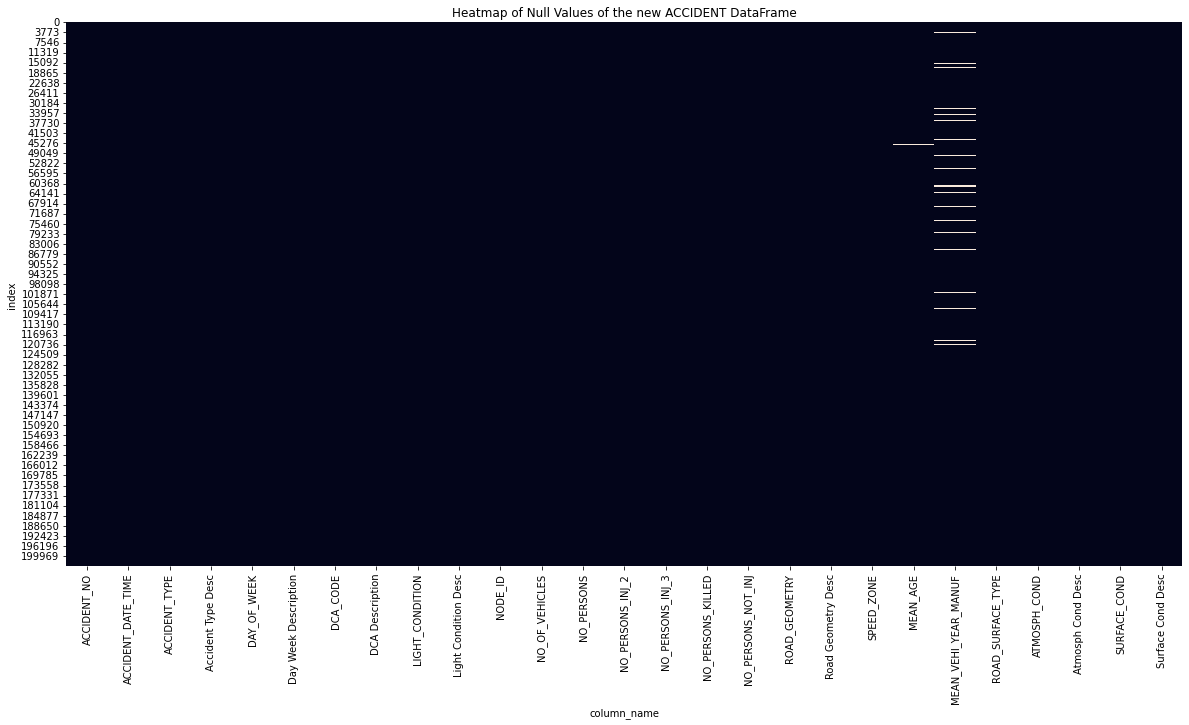

In [10]:
plt.figure(figsize=(20,10))
sns.heatmap(df_acc.isnull(), cbar=False)
plt.ylabel('index')
plt.xlabel('column_name')
plt.title(f'Heatmap of Null Values of the new ACCIDENT DataFrame')
plt.show()

**MEAN_AGE:** drop samples with null values

**MEAN_VEHI_YEAR_MANUF:** impute with a median strategy

In [12]:
# Mean Age
df_acc = df_acc[df_acc["MEAN_AGE"].notna()]

In [ ]:
# Mean vehicle year manufacturing
from sklearn.impute import SimpleImputer

SI = SimpleImputer(strategy='median')
df_acc.MEAN_VEHI_YEAR_MANUF = SI.fit_transform(df_acc["MEAN_VEHI_YEAR_MANUF"].values.reshape(-1,1))

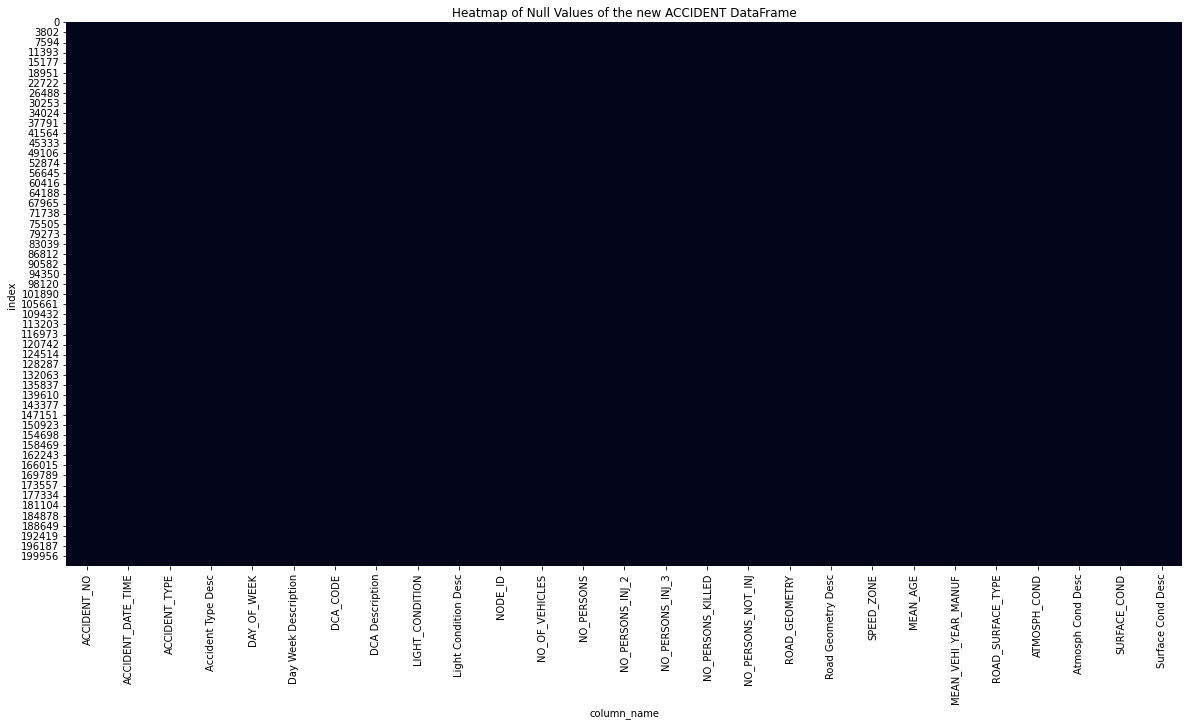

In [14]:
plt.figure(figsize=(20,10))
sns.heatmap(df_acc.isnull(), cbar=False)
plt.ylabel('index')
plt.xlabel('column_name')
plt.title(f'Heatmap of Null Values of the new ACCIDENT DataFrame')
plt.show()

No null values anymore !

In [15]:
df_acc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 203185 entries, 0 to 203707
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ACCIDENT_NO           203185 non-null  object 
 1   ACCIDENT_DATE_TIME    203185 non-null  object 
 2   ACCIDENT_TYPE         203185 non-null  int64  
 3   Accident Type Desc    203185 non-null  object 
 4   DAY_OF_WEEK           203185 non-null  int64  
 5   Day Week Description  203185 non-null  object 
 6   DCA_CODE              203185 non-null  int64  
 7   DCA Description       203185 non-null  object 
 8   LIGHT_CONDITION       203185 non-null  int64  
 9   Light Condition Desc  203185 non-null  object 
 10  NODE_ID               203185 non-null  int64  
 11  NO_OF_VEHICLES        203185 non-null  int64  
 12  NO_PERSONS            203185 non-null  int64  
 13  NO_PERSONS_INJ_2      203185 non-null  int64  
 14  NO_PERSONS_INJ_3      203185 non-null  int64  
 15  